<a href="https://colab.research.google.com/github/Rodrigo-Antonio-Silva/DataScienceProject/blob/main/An%C3%A1lisePedidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise de Tempos do Ciclo do Pedido


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
headers = ['NOTA_FISCAL', 'QTD_FAT', 'R1', 'PAG', 'PEDIDO', 'PROCESSAMENTO', 'ENVIO', 'RECEBIDO']

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Bases_DS/Cópia de Análise de Dados Vale_Online_10_2020.xlsx', sheet_name=19, usecols=[1, 2, 3, 4, 5, 6, 7, 8], skiprows=[0], names=headers, index_col='NOTA_FISCAL')

In [ ]:
df.head()

,QTD_FAT,R1,PAG,PEDIDO,PROCESSAMENTO,ENVIO,RECEBIDO
NOTA_FISCAL,,,,,,,
1,988.992962,0.221175,BOLETO,2003-06-01,2003-06-09,2003-06-16,2003-06-26
2,954.059864,0.028348,BOLETO,2003-06-02,2003-06-13,2003-06-16,2003-06-29
3,1180.785719,0.961085,CRÉDITO,2003-06-03,2003-06-06,2003-06-09,2003-06-16
4,1126.766281,0.427370,BOLETO,2003-06-04,2003-06-12,2003-06-17,2003-06-21
5,859.939180,0.246722,BOLETO,2003-06-05,2003-06-11,2003-06-16,2003-06-24


In [ ]:
df['Trim'] = pd.to_datetime(df['RECEBIDO'], format='%y-%m-%d').dt.quarter

In [ ]:
df['Ano'] = pd.to_datetime(df['RECEBIDO'], format='%Y-%m-%d').dt.year


In [ ]:
df.head()

,QTD_FAT,R1,PAG,PEDIDO,PROCESSAMENTO,ENVIO,RECEBIDO,Trim,Ano
NOTA_FISCAL,,,,,,,,,
1,988.992962,0.221175,BOLETO,2003-06-01,2003-06-09,2003-06-16,2003-06-26,2,2003
2,954.059864,0.028348,BOLETO,2003-06-02,2003-06-13,2003-06-16,2003-06-29,2,2003
3,1180.785719,0.961085,CRÉDITO,2003-06-03,2003-06-06,2003-06-09,2003-06-16,2,2003
4,1126.766281,0.427370,BOLETO,2003-06-04,2003-06-12,2003-06-17,2003-06-21,2,2003
5,859.939180,0.246722,BOLETO,2003-06-05,2003-06-11,2003-06-16,2003-06-24,2,2003


In [ ]:
df.tail()

,QTD_FAT,R1,PAG,PEDIDO,PROCESSAMENTO,ENVIO,RECEBIDO,Trim,Ano
NOTA_FISCAL,,,,,,,,,
968,1173.220542,0.834750,CRÉDITO,2006-01-23,2006-01-27,2006-01-30,2006-02-10,1,2006
969,1012.593773,0.401944,BOLETO,2006-01-24,2006-02-06,2006-02-11,2006-02-16,1,2006
970,1099.594445,0.557090,CRÉDITO,2006-01-25,2006-01-29,2006-02-01,2006-02-10,1,2006
971,920.725941,0.319448,BOLETO,2006-01-26,2006-02-05,2006-02-10,2006-02-18,1,2006
972,926.292276,0.079651,BOLETO,2006-01-27,2006-02-05,2006-02-10,2006-02-16,1,2006


In [ ]:
df = df[(df.Ano > 2003) & (df.Ano < 2006)]

In [ ]:
df

,QTD_FAT,R1,PAG,PEDIDO,PROCESSAMENTO,ENVIO,RECEBIDO,Trim,Ano
NOTA_FISCAL,,,,,,,,,
193,1164.117864,0.056333,BOLETO,2003-12-10,2003-12-19,2003-12-23,2004-01-01,1,2004
197,1126.615987,0.379698,BOLETO,2003-12-14,2003-12-19,2003-12-23,2004-01-01,1,2004
199,930.091008,0.373490,BOLETO,2003-12-16,2003-12-22,2003-12-25,2004-01-06,1,2004
200,934.932475,0.451711,BOLETO,2003-12-17,2003-12-26,2003-12-31,2004-01-09,1,2004
201,1040.812665,0.944958,CRÉDITO,2003-12-18,2003-12-23,2003-12-27,2004-01-06,1,2004
...,...,...,...,...,...,...,...,...,...
918,1016.333615,0.834658,CRÉDITO,2005-12-04,2005-12-08,2005-12-13,2005-12-21,4,2005
921,978.405867,0.914614,CRÉDITO,2005-12-07,2005-12-12,2005-12-17,2005-12-26,4,2005
922,1105.399749,0.738888,CRÉDITO,2005-12-08,2005-12-13,2005-12-18,2005-12-25,4,2005


In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


QTD_FAT    1000.600024
R1            0.531552
Trim          2.499310
Ano        2004.502069
dtype: float64

Para cada um dos pedidos, calcule os tempos de PROCESSAMENTO, CUSTOMIZAÇÃO E ENVIO, RECEBIMENTO e TEMPO TOTAL.



In [ ]:
df_time = df.loc[:,'PAG':'Ano']

In [ ]:
time_process = df_time.PROCESSAMENTO - df_time.PEDIDO

In [ ]:
time_process.name='t_process'

In [ ]:
time_envio = df_time.ENVIO - df_time.PROCESSAMENTO

In [ ]:
time_envio.name='t_send'

In [ ]:
time_receive = df_time.RECEBIDO - df_time.ENVIO

In [ ]:
time_receive.name='t_payment'

Faça a análise estatística e gráfica dos tempos de PROCESSAMENTO, CUSTOMIZAÇÃO E ENVIO, RECEBIMENTO e TEMPO TOTAL.


In [ ]:
df_time_total = pd.concat([df['PAG'], time_process, time_envio, time_receive], axis=1)

In [ ]:
df_time_total['Ano'] = df['Ano']

In [ ]:
df_time_total['Trim'] = df['Trim']

In [ ]:
df_time_total

,PAG,t_process,t_send,t_payment,Ano,Trim
NOTA_FISCAL,,,,,,
193,BOLETO,9 days,4 days,9 days,2004,1
197,BOLETO,5 days,4 days,9 days,2004,1
199,BOLETO,6 days,3 days,12 days,2004,1
200,BOLETO,9 days,5 days,9 days,2004,1
201,CRÉDITO,5 days,4 days,10 days,2004,1
...,...,...,...,...,...,...
918,CRÉDITO,4 days,5 days,8 days,2005,4
921,CRÉDITO,5 days,5 days,9 days,2005,4
922,CRÉDITO,5 days,5 days,7 days,2005,4


In [ ]:
df_time_total['t_process'] = df_time_total['t_process'].dt.days

In [ ]:
df_time_total['t_send'] = df_time_total['t_send'].dt.days

In [ ]:
df_time_total['t_payment'] = df_time_total['t_payment'].dt.days

In [ ]:
df_time_total['Total'] = df_time_total.t_process + df_time_total.t_send + df_time_total.t_payment

In [ ]:
df_time_total.describe()

,t_process,t_send,t_payment,Ano,Trim,Total
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000
mean,6.896552,4.462069,9.576552,2004.502069,2.499310,20.935172
std,4.801479,1.046044,2.056858,0.500341,1.113236,5.436976
min,0.000000,2.000000,3.000000,2004.000000,1.000000,9.000000
25%,4.000000,4.000000,8.000000,2004.000000,2.000000,17.000000
50%,5.000000,4.000000,9.000000,2005.000000,2.000000,20.000000
75%,9.000000,5.000000,11.000000,2005.000000,3.000000,23.000000
max,29.000000,7.000000,18.000000,2005.000000,4.000000,44.000000


In [ ]:
df_time_total

,PAG,t_process,t_send,t_payment,Ano,Trim,Total
NOTA_FISCAL,,,,,,,
193,BOLETO,9,4,9,2004,1,22
197,BOLETO,5,4,9,2004,1,18
199,BOLETO,6,3,12,2004,1,21
200,BOLETO,9,5,9,2004,1,23
201,CRÉDITO,5,4,10,2004,1,19
...,...,...,...,...,...,...,...
918,CRÉDITO,4,5,8,2005,4,17
921,CRÉDITO,5,5,9,2005,4,19
922,CRÉDITO,5,5,7,2005,4,17


In [ ]:
df_time_total.groupby(['Ano', 'Trim'])['t_process', 't_send', 't_payment', 'Total'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


t_process    t_send  t_payment      Total
Ano  Trim                                           
2004 1      6.471910  4.494382   9.449438  20.415730
     2      6.555556  4.466667   9.733333  20.755556
     3      6.417582  4.450549   9.758242  20.626374
     4      7.461538  4.428571   9.494505  21.384615
2005 1      6.855556  4.477778   9.544444  20.877778
     2      7.457447  4.425532   9.553191  21.436170
     3      6.673913  4.510870   9.391304  20.576087
     4      7.261364  4.443182   9.693182  21.397727

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


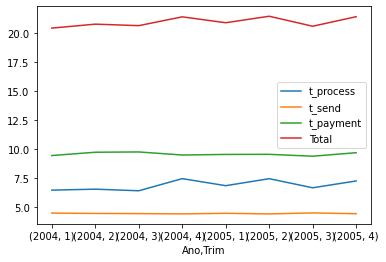

In [ ]:
(df_time_total.groupby(['Ano', 'Trim'])['t_process', 't_send', 't_payment', 'Total'].mean()).plot(kind='line')

Considere agora as diferenças entre aqueles pedidos efetuados através de boletos e aqueles feitos através de crédito.

In [ ]:
df_boleto = df_time_total.loc[df_time_total['PAG'] == 'BOLETO']

In [ ]:
df_boleto

,PAG,t_process,t_send,t_payment,Ano,Trim,Total
NOTA_FISCAL,,,,,,,
193,BOLETO,9,4,9,2004,1,22
197,BOLETO,5,4,9,2004,1,18
199,BOLETO,6,3,12,2004,1,21
200,BOLETO,9,5,9,2004,1,23
202,BOLETO,7,6,9,2004,1,22
...,...,...,...,...,...,...,...
911,BOLETO,12,6,10,2005,4,28
912,BOLETO,10,4,8,2005,4,22
913,BOLETO,0,5,10,2005,4,15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


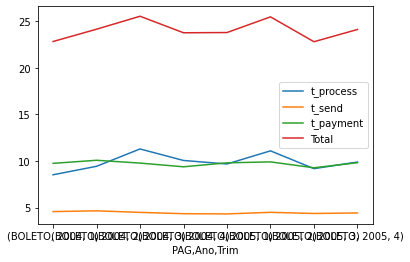

In [ ]:
(df_boleto.groupby(['PAG', 'Ano', 'Trim'])['t_process', 't_send', 't_payment', 'Total'].mean()).plot(kind='line')

In [ ]:
df_credito = df_time_total.loc[df_time_total['PAG'] == 'CRÉDITO']

In [ ]:
df_credito

,PAG,t_process,t_send,t_payment,Ano,Trim,Total
NOTA_FISCAL,,,,,,,
201,CRÉDITO,5,4,10,2004,1,19
206,CRÉDITO,7,4,8,2004,1,19
207,CRÉDITO,3,5,13,2004,1,21
208,CRÉDITO,5,4,8,2004,1,17
209,CRÉDITO,4,5,11,2004,1,20
...,...,...,...,...,...,...,...
917,CRÉDITO,4,4,7,2005,4,15
918,CRÉDITO,4,5,8,2005,4,17
921,CRÉDITO,5,5,9,2005,4,19


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


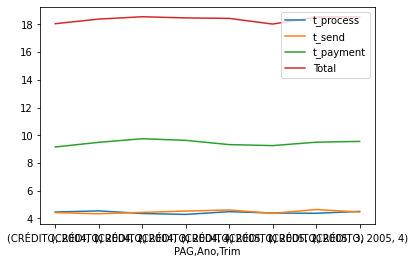

In [ ]:
(df_credito.groupby(['PAG', 'Ano', 'Trim'])['t_process', 't_send', 't_payment', 'Total'].mean()).plot(kind='line')

Análisando os dados é possível verificar que o tempo de processamento é o que mais impacta no tempo total do cliclo. Isso acontece principalmente na modalidade de pagamento boleto. Talvez por conta do tempo de compensação bancária para comprovação do pagamento o que acarreta em um delay maior na expedição do produto. Estimular as vendas a crédito e negociar com o banco uma verificação mais rápida dos pagamentos em boleto, são algumas alternativas para melhorar o indicador.

Quais das etapas do ciclo do pedido contribuem negativamente para a consistência do processo como um todo.


As etapas de processamento e recebimento são as etapas que contribuiem negativamente no tempo total do cliclo. Principalmente o processamento, uma revisão do processo pode elucidar pontos de melhoria. No recebimento uma parceira logística poderia ser uma solução para redução desse ciclo.